<div style='background-color: orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#questions'>Questions To Answer</a></li>
<li><a href='#wrangle'>Wrangle Data</a></li>
<li><a href='#q1'>Question 1</a></li>
<li><a href='#q2'>Question 2</a></li>
<li><a href='#q3'>Question 3</a></li>
<li><a href='#q4'>Question 4</a></li>
<li><a href='#q5'>Question 5</a></li>
<li><a href='#q6'>Question 6</a></li>
<li><a href='#q7'>Question 7</a></li>
<li><a href='#q8'>Question 8</a></li>
<li><a href='#misc'>Miscellaneous</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

In [42]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN
from sklearn.cluster import DBSCAN

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# .py files
import wrangle as w

<div style='background-color: orange'>
<a id='questions'></a>
    <b><u><i><h1 style='text-align: center'>
        Questions To Answer
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
    - <b>ANSWER:</b> The introduction lesson is the most frequent across cohorts, wheras the html-css is the most frequent across programs.

---

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
    - <b>ANSWER:</b>

---

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
    - <b>ANSWER:</b> 95 out of 731 students during their active time use the curriculum less than once a day.  19 out of 731 use it less than weekly. 5 out of 731 use it less than monthly

---

4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
    - <b>ANSWER:</b> '192.171.117.210', '70.123.193.100', '97.105.19.58', '97.105.19.61' appear to be anomalies compared to everyone else.

---

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
    - <b>ANSWER:</b> There doesn't appear to be much history pertaining to data science activity to make a definite comparison between the two.  With what we have, there doesn't appear to be anything significant.

---

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
    - <b>ANSWER:</b> javascript-i, spring, html-css, mysql, and java-ii

---

7. Which lessons are least accessed?
    - <b>ANSWER:</b> There are 100 lessons that were only accessed once

---

8. Anything else I should be aware of?
    - <b>ANSWER:</b>

<div style='background-color: orange'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align: center'>
        Wrangle Data
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

In [2]:
# From the 'wrangle.py' file...
# Acquire and prepare the curriculum logs dataframe
curr_logs = w.wrangle_curriculum_logs()
curr_logs.sample()

,path,path_subject,path_lesson,ip,program_name,program_id,cohort_name,cohort_id,user_id,cohort_start_date,cohort_end_date
entry_datetime,,,,,,,,,,,
2019-07-12 15:45:10,jquery/effects,jquery,effects,97.105.19.58,Web Development,1.0,Betelgeuse,32.0,416,2019-05-28,2019-10-08


<div style='background-color: orange'>
<a id='q1'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 1
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1cohort'>Across Cohorts</a></li>
<li><a href='#q1program'>Across Programs</a></li>

<b><i>QUESTION 1:</i></b> Which lesson appears to attract the most traffic consistently across cohorts (per program)?

<b><i>ANSWER:</i></b> The introduction lesson is the most frequent across cohorts, wheras the html-css is the most frequent across programs.

---

<a id='q1cohort'></a>
<h3><b><i>
    Across Cohorts
</i></b></h3>
<li><a href='#q1'>Question 1 Top</a></li>

In [4]:
# Make temp df with rows that have a lesson
has_lesson = curr_logs[curr_logs.path_lesson != 'None']

In [5]:
# Most viewed lesson per cohort
visit_counts_cohort = has_lesson.groupby(by=['cohort_id', 'path_lesson']).size().reset_index(name='visit_count')
visit_totals = visit_counts_cohort.groupby('cohort_id')['visit_count'].transform('sum')
visit_percent = round(visit_counts_cohort.visit_count / visit_totals, 3)
visit_counts_cohort['visit_percentage'] = visit_percent
visit_counts_cohort = visit_counts_cohort.sort_values(['cohort_id', 'visit_count'], ascending=[True, False])
most_viewed_lessons = visit_counts_cohort.groupby('cohort_id').head(1)
most_viewed_lessons

,cohort_id,path_lesson,visit_count,visit_percentage
68,1.0,fundamentals,574,0.089
165,2.0,command-line,13,0.186
191,4.0,databases,1,0.333
198,6.0,es6,10,0.286
254,7.0,introduction,92,0.192
349,8.0,fundamentals,102,0.095
440,9.0,html-css,2,0.500
453,11.0,css-i,16,0.096
512,12.0,html-css,19,0.069
660,13.0,quickstart,309,0.126


In [87]:
# Most frequent lessons across cohorts
visit_counts_cohort.groupby(by='path_lesson')['visit_percentage'].mean().sort_values(ascending=False).head(3)

path_lesson
introduction    0.076325
versioning      0.068200
fundamentals    0.064556
Name: visit_percentage, dtype: float64

---

<a id='q1program'></a>
<h3><b><i>
    Across Programs
</i></b></h3>
<li><a href='#q1'>Question 1 Top</a></li>

In [7]:
# Most viewed lesson per program
visit_counts_program = has_lesson.groupby(by=['program_id', 'path_lesson']).size().reset_index(name='visit_count')
visit_totals = visit_counts_program.groupby('program_id')['visit_count'].transform('sum')
visit_percent = round(visit_counts_program.visit_count / visit_totals, 3)
visit_counts_program['visit_percentage'] = visit_percent
visit_counts_program = visit_counts_program.sort_values(['program_id', 'visit_count'], ascending=[True, False])
most_viewed_lessons2 = visit_counts_program.groupby('program_id').head(1)
most_viewed_lessons2

,program_id,path_lesson,visit_count,visit_percentage
231,1.0,introduction,35652,0.071
719,2.0,overview,4096,0.043
1159,3.0,fundamentals,3463,0.058
1412,4.0,html-css,2,0.500
1801,5.0,search_index.json,2029,0.079


In [88]:
# Most frequent lessons across programs
visit_counts_program.groupby(by='path_lesson')['visit_percentage'].mean().sort_values(ascending=False).head(3)

path_lesson
html-css        0.125500
fundamentals    0.064333
gitbook         0.063500
Name: visit_percentage, dtype: float64

<div style='background-color: orange'>
<a id='q2'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 2
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

<b><i>QUESTION 2:</i></b>  Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

<b><i>ANSWER:</i></b> 

---

In [8]:
most_viewed_lessons

,cohort_id,path_lesson,visit_count,visit_percentage
68,1.0,fundamentals,574,0.089
165,2.0,command-line,13,0.186
191,4.0,databases,1,0.333
198,6.0,es6,10,0.286
254,7.0,introduction,92,0.192
349,8.0,fundamentals,102,0.095
440,9.0,html-css,2,0.500
453,11.0,css-i,16,0.096
512,12.0,html-css,19,0.069
660,13.0,quickstart,309,0.126


<div style='background-color: orange'>
<a id='q3'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 3
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q3df'>Create Filtered Dataframe</a></li>
<li><a href='#q3stats'>Statistical Checks</a></li>
<li><a href='#q3dbscan'>DBSCAN Anomaly Detection</a></li>

<b><i>QUESTION 3:</i></b> Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

<b><i>ANSWER:</i></b> 95 out of 731 students during their active time use the curriculum less than once a day.  19 out of 731 use it less than weekly. 5 out of 731 use it less than monthly

---

<a id='q3df'></a>
<h3><b><i>
    Create Filtered Dataframe
</i></b></h3>
<li><a href='#q3'>Question 3 Top</a></li>

In [65]:
# Create temp df with ONLY students DURING program timeframe (731 total)
active_students = curr_logs[curr_logs.index < curr_logs.cohort_end_date]
active_students['duration'] = active_students.cohort_end_date - active_students.cohort_start_date
active_students_duration = pd.DataFrame(active_students.groupby('user_id').duration.mean())
active_students_total = pd.DataFrame(active_students.groupby('user_id').path.count())
active_students_total = active_students_total.rename(columns={'path' : 'total'})
active_students_unique = pd.DataFrame(active_students.groupby('user_id').path.nunique())
active_students_unique = active_students_unique.rename(columns={'path' : 'unique'})
active_students = pd.concat([active_students_total, active_students_unique, active_students_duration], axis=1)
active_students.sample()

,total,unique,duration
user_id,,,
18,1173,169,129 days


---

<a id='q3stats'></a>
<h3><b><i>
    Statistical Checks
</i></b></h3>
<li><a href='#q3'>Question 3 Top</a></li>

In [67]:
# Clean duration column for stat checking
active_students.duration = active_students.duration.astype(str).str[:3].astype(int)
active_students.sample()

,total,unique,duration
user_id,,,
269,1845,171,144


In [78]:
# Get the ratio of views by the course duration per user
active_students['total_and_duration_ratio'] = round(active_students.total / active_students.duration, 2)
active_students[active_students.total_and_duration_ratio < 1].shape

(95, 4)

In [80]:
# Check for those who use it less than every week
active_students[active_students.total_and_duration_ratio < 0.14].shape

(19, 4)

In [81]:
# Check for those who use it less than every month
active_students[active_students.total_and_duration_ratio < 0.03].shape

(5, 4)

---

<a id='q3dbscan'></a>
<h3><b><i>
    DBSCAN Anomaly Detection
</i></b></h3>
<li><a href='#q3'>Question 3 Top</a></li>

In [45]:
# Use DBSCAN to detect anomalies
# First scale the information
scaled = MinMaxScaler().fit_transform(active_students[['total', 'unique']])
active_students['scaled_total'] = scaled[:, 0]
active_students['scaled_unique'] = scaled[:, 1]
active_students.sample()

,total,unique,duration,scaled_total,scaled_unique
user_id,,,,,
583,464,147,155 days,0.097228,0.563707


In [46]:
# Make, fit, and use DBSCAN
d_clusts = DBSCAN(eps=0.1, min_samples=15)
d_clusts.fit(scaled)
active_students['cluster_labels'] = d_clusts.labels_
active_students.sample()

,total,unique,duration,scaled_total,scaled_unique,cluster_labels
user_id,,,,,,
268,1491,241,175 days 01:47:12.193158954,0.312894,0.926641,-1


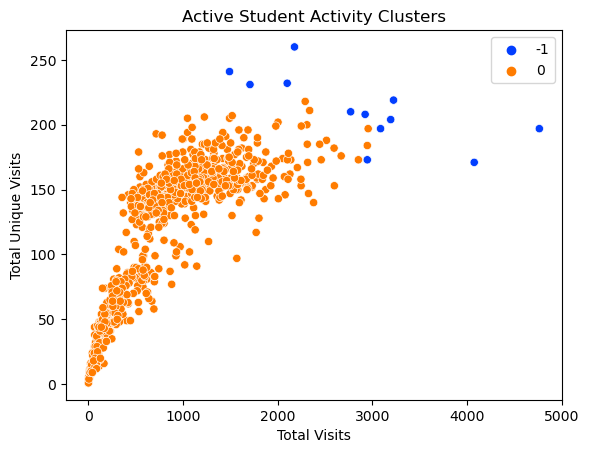

In [47]:
# Visualize the clusters
sns.scatterplot(data=active_students, x='total', y='unique', hue='cluster_labels', palette='bright')
plt.title('Active Student Activity Clusters')
plt.xlabel('Total Visits')
plt.ylabel('Total Unique Visits')
plt.legend()
plt.show()

<div style='background-color: orange'>
<a id='q4'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 4
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

<b><i>QUESTION 4:</i></b> Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

<b><i>ANSWER:</i></b> '192.171.117.210', '70.123.193.100', '97.105.19.58', '97.105.19.61' appear to be anomalies compared to everyone else.

---

In [ ]:
# Create user df
user_uniques = curr_logs.groupby('ip').path.nunique()
user_totals = curr_logs.groupby('ip').path.count()
user_avg = round(user_totals / user_uniques, 2)
user_df = pd.DataFrame(user_uniques)
user_df.rename(columns={'path' : 'unique_visits'}, inplace=True)
user_df['total_visits'] = user_totals
user_df['avg_visits_per_unique_visit'] = user_avg
user_df[user_df.avg_visits_per_unique_visit < 2]

In [ ]:
# Scale user df
scaler = MinMaxScaler().fit(user_df)
scaled = scaler.transform(user_df)
user_df['scaled_uniques'] = scaled[:, 0]
user_df['scaled_total'] = scaled[:, 1]
user_df['scaled_avg'] = scaled[:, 2]

In [ ]:
# Make the thing
d_clusts = DBSCAN(eps=0.1, min_samples=15)
# Fit the thing
d_clusts.fit(scaled)

In [ ]:
user_df['cluster_label'] = d_clusts.labels_
user_df.cluster_label.value_counts()

In [ ]:
sns.scatterplot(data=user_df, x='total_visits', y='unique_visits', hue='cluster_label', palette='bright')
plt.title('DBSCAN Cluster of IP Total vs. Unique Visits')
plt.xlabel('Total Visits')
plt.ylabel('Unique Visits')
plt.show()

In [ ]:
user_df[user_df.cluster_label == -1]

<div style='background-color: orange'>
<a id='q5'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 5
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

<b><i>QUESTION 5:</i></b> At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

<b><i>ANSWER:</i></b> There doesn't appear to be much history pertaining to data science activity to make a definite comparison between the two.  With what we have, there doesn't appear to be anything significant.

---

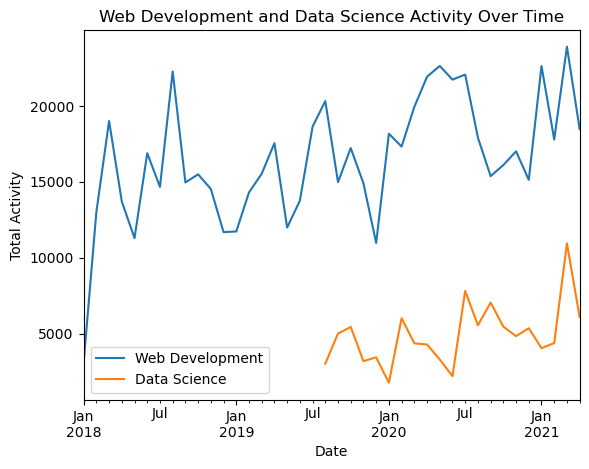

In [91]:
# Total activity of programs over time
curr_logs[curr_logs.program_name == 'Web Development'].resample('m').path.count().plot(label='Web Development')
curr_logs[curr_logs.program_name == 'Data Science'].resample('m').path.count().plot(label='Data Science')
plt.title('Web Development and Data Science Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Activity')
plt.legend()
plt.show()

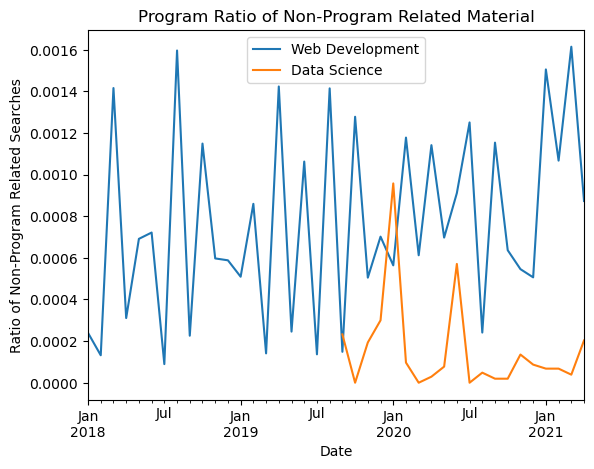

In [133]:
# Ratio of programs searching other program material
(curr_logs[(curr_logs.program_name == 'Web Development') & (curr_logs.path.str.contains('data'))].resample('m').path.count() / curr_logs[curr_logs.program_name == 'Web Development'].shape[0]).plot(label='Web Development')
(curr_logs[(curr_logs.program_name == 'Data Science') & (curr_logs.path.str.contains('java|html|jquery|css'))].resample('m').path.count() / curr_logs[curr_logs.program_name == 'Data Science'].shape[0]).plot(label='Data Science')
plt.title('Program Ratio of Non-Program Related Material')
plt.xlabel('Date')
plt.ylabel('Ratio of Non-Program Related Searches')
plt.legend()
plt.show()

<div style='background-color: orange'>
<a id='q6'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 6
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

<b><i>QUESTION 6:</i></b> What topics are grads continuing to reference after graduation and into their jobs (for each program)?

<b><i>ANSWER:</i></b> javascript-i, spring, html-css, mysql, and java-ii.

---

In [90]:
# Only use activity of graduates that are known students
grad_activity = curr_logs[curr_logs.index > curr_logs.cohort_end_date]
grad_activity = grad_activity[grad_activity.cohort_name != 'Staff']
grad_activity = grad_activity[grad_activity.path_subject != 'Home']
grad_activity_all = grad_activity[(grad_activity.program_id == 1) | (grad_activity.program_id == 2)]
grad_activity_all.head(4)
#pd.DataFrame(grad_activity.path_subject.value_counts(normalize=True))

,path,path_subject,path_lesson,ip,program_name,program_id,cohort_name,cohort_id,user_id,cohort_start_date,cohort_end_date
entry_datetime,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,java-ii,None,97.105.19.61,Web Development,1.0,Hampton,8.0,1,2015-09-22,2016-02-06
2018-01-26 09:56:05,java-ii/object-oriented-programming,java-ii,object-oriented-programming,97.105.19.61,Web Development,1.0,Hampton,8.0,1,2015-09-22,2016-02-06
2018-01-26 09:56:06,slides/object_oriented_programming,slides,object_oriented_programming,97.105.19.61,Web Development,1.0,Hampton,8.0,1,2015-09-22,2016-02-06
2018-01-26 10:14:51,javascript-i,javascript-i,None,97.105.19.61,Web Development,1.0,Arches,1.0,11,2014-02-04,2014-04-22


<div style='background-color: orange'>
<a id='q7'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 7
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

<b><i>QUESTION 7:</i></b> Which lessons are least accessed?

<b><i>ANSWER:</i></b> There are 100 lessons that were only accessed once

---

In [ ]:
curr_logs.groupby('path_lesson').size().sort_values().head(101)

<div style='background-color: orange'>
<a id='q8'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 8
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

<b><i>QUESTION 8:</i></b> Anything else I should be aware of?

<b><i>ANSWER:</i></b> 

---

<div style='background-color: orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align: center'>
        Miscellaneous
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>